In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [52]:
data = pd.read_excel("snap_test_sentiment1.xlsx")
data

,userName,rating,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,total
0,-/:/anganik,1,0.000000,0.000000,0.000000,0.142857,0.142857,0.285714,0.142857,0.142857,0.142857,0.000000,1
1,-Attention-,4,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.083333,0.083333,0.083333,1
2,-Jeilyn-,5,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,1
3,-Kxtiee-,3,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.125000,0.000000,0.250000,1
4,-MakaylaKayla-,5,0.000000,0.000000,0.043478,0.043478,0.217391,0.043478,0.347826,0.043478,0.000000,0.260870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,🧼🚽,4,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1
9376,소피 🎀,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1
9377,ㅍ혀너ㅠㄴ,4,0.000000,0.000000,0.111111,0.111111,0.222222,0.111111,0.444444,0.000000,0.000000,0.000000,1
9378,愛┗ûñå💫‼️,4,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,1


In [53]:
data["anger+disgust"] = data["anger"] + data["disgust"]
data["fear+negative+sadness"] = data["fear"] + data["negative"] + data["sadness"]
data["positive+joy+trust"] = data["positive"] + data["joy"] + data["trust"]
data["acticipation+surprise"] = data["anticipation"] + data["surprise"]

In [54]:
data

,userName,rating,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,total,anger+disgust,fear+negative+sadness,positive+joy+trust,acticipation+surprise
0,-/:/anganik,1,0.000000,0.000000,0.000000,0.142857,0.142857,0.285714,0.142857,0.142857,0.142857,0.000000,1,0.000000,0.571429,0.285714,0.142857
1,-Attention-,4,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.083333,0.083333,0.083333,1,0.166667,0.250000,0.416667,0.166667
2,-Jeilyn-,5,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,1,0.000000,0.000000,0.750000,0.250000
3,-Kxtiee-,3,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.125000,0.000000,0.250000,1,0.125000,0.375000,0.500000,0.000000
4,-MakaylaKayla-,5,0.000000,0.000000,0.043478,0.043478,0.217391,0.043478,0.347826,0.043478,0.000000,0.260870,1,0.043478,0.130435,0.826087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,🧼🚽,4,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.500000,0.500000
9376,소피 🎀,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,1.000000,0.000000
9377,ㅍ혀너ㅠㄴ,4,0.000000,0.000000,0.111111,0.111111,0.222222,0.111111,0.444444,0.000000,0.000000,0.000000,1,0.111111,0.222222,0.666667,0.000000
9378,愛┗ûñå💫‼️,4,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,1,0.200000,0.200000,0.600000,0.000000


In [55]:
df = data.sort_values(by=['rating'])

In [56]:
df[df["rating"] == 4]

,userName,rating,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,total,anger+disgust,fear+negative+sadness,positive+joy+trust,acticipation+surprise
90,@crackhead_45,4,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.000000,1,0.333333,0.666667,0.000000,0.000000
6912,Player1784402,4,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0.000000,0.000000,0.000000,1.000000
8393,this game is the best🤩🤩,4,0.181818,0.000000,0.090909,0.181818,0.000000,0.272727,0.272727,0.0,0.0,0.000000,1,0.272727,0.454545,0.272727,0.000000
4515,jrkidndksosksmdj,4,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,1,0.000000,1.000000,0.000000,0.000000
8403,thismomamy,4,0.000000,0.181818,0.000000,0.000000,0.272727,0.000000,0.363636,0.0,0.0,0.181818,1,0.000000,0.000000,0.818182,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,kayleigh c :),4,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.0,0.333333,1,0.333333,0.000000,0.666667,0.000000
8718,User1549264840::8,4,0.083333,0.250000,0.000000,0.000000,0.166667,0.083333,0.250000,0.0,0.0,0.166667,1,0.083333,0.083333,0.583333,0.250000
5894,mcdakfzlg,4,0.000000,0.222222,0.000000,0.000000,0.222222,0.000000,0.333333,0.0,0.0,0.222222,1,0.000000,0.000000,0.777778,0.222222
5934,megbluess,4,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.0,0.0,0.000000,1,0.000000,0.333333,0.666667,0.000000


In [57]:
df_x = pd.DataFrame(df[["anger+disgust", "fear+negative+sadness", "positive+joy+trust", "acticipation+surprise"]])
df_y = pd.DataFrame(df[["rating"]])

In [58]:
df_y

,rating
0,1
6633,1
2319,1
6632,1
6631,1
...,...
6741,5
2227,5
6749,5
2234,5


In [59]:
logit_model = sm.MNLogit(df_y, sm.add_constant(df_x))
logit_model
result = logit_model.fit()
stats1 = result.summary()
stats2 = result.summary2()
print(stats1)
#print(stats2)

         Current function value: 1.565189
         Iterations: 35


c:\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:                 rating   No. Observations:                 9380
Model:                        MNLogit   Df Residuals:                     9360
Method:                           MLE   Df Model:                           16
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                 0.01519
Time:                        07:01:12   Log-Likelihood:                -14681.
converged:                      False   LL-Null:                       -14908.
Covariance Type:            nonrobust   LLR p-value:                 2.658e-86
             rating=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2811   1.74e+06  -1.62e-07      1.000    -3.4e+06     3.4e+06
anger+disgust            -0.4231    3.7e+06  -1.14e-07      1.000   -7.26e+06    7.26e+06
fear+neg

c:\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


In [60]:
import math
from nltk.corpus import stopwords
from keras import backend as K
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten, Activation
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from datetime import datetime
start_real = datetime.now()

In [61]:
dataframe = pd.read_csv("Snapchat_app_store_reviews.csv")
dataframe

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10-04-2020 06:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10-02-2020 13:58,"Locked me out, customer service not helping"
...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used to love using Snapchat and now I hardly...,False,6/24/19 0:58,Major issue...not that it will get fixed
9556,9556,changemaker kkdd,2,"Well, I did deleted it because there was some ...",False,6/23/19 13:42,I got then deleted it.
9557,9557,teekay2much,4,Every time I upload a photo or video to my sto...,False,06-03-2019 03:35,Story problem
9558,9558,whoratheexplora,4,"Love this app, but since he update I can’t upl...",False,06-03-2019 03:26,Bugs


In [62]:
stop = stopwords.words('english')
dataframe['review'] = dataframe['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
dataframe

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For part I quite enjoy Snapchat it’s probably ...,False,10-04-2020 06:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry say it, something definitely wrong S...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined story organization! Ok ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love app long using say difficulties ...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This super frustrating. I middle sending Snapc...,False,10-02-2020 13:58,"Locked me out, customer service not helping"
...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used love using Snapchat I hardly ever do. T...,False,6/24/19 0:58,Major issue...not that it will get fixed
9556,9556,changemaker kkdd,2,"Well, I deleted inappropriate content I resear...",False,6/23/19 13:42,I got then deleted it.
9557,9557,teekay2much,4,Every time I upload photo video story upload l...,False,06-03-2019 03:35,Story problem
9558,9558,whoratheexplora,4,"Love app, since update I can’t upload snaps st...",False,06-03-2019 03:26,Bugs


In [63]:
import nltk
import string
import re
import numpy as np
import pandas as pd
import pickle

# Libraries for Plots & Visualisation...
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for NLP...
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import text

In [64]:
from nrclex import NRCLex

In [65]:
dataframe

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For part I quite enjoy Snapchat it’s probably ...,False,10-04-2020 06:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry say it, something definitely wrong S...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined story organization! Ok ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love app long using say difficulties ...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This super frustrating. I middle sending Snapc...,False,10-02-2020 13:58,"Locked me out, customer service not helping"
...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used love using Snapchat I hardly ever do. T...,False,6/24/19 0:58,Major issue...not that it will get fixed
9556,9556,changemaker kkdd,2,"Well, I deleted inappropriate content I resear...",False,6/23/19 13:42,I got then deleted it.
9557,9557,teekay2much,4,Every time I upload photo video story upload l...,False,06-03-2019 03:35,Story problem
9558,9558,whoratheexplora,4,"Love app, since update I can’t upload snaps st...",False,06-03-2019 03:26,Bugs


In [66]:
emotion = []
for j in range(dataframe.shape[0]):
    emotion.append(NRCLex(dataframe["review"][j]))

In [67]:
diction = {"fear": [],
           "anger":[],
           "anticip":[],
           "trust":[],
           "surprise":[],
           "positive":[],
           "negative":[],
           "sadness":[],
           "disgust":[],
           "joy":[]}

In [68]:
for k in range(len(emotion)):
    diction["fear"].append(emotion[k].affect_frequencies["fear"])
    diction["anger"].append(emotion[k].affect_frequencies["anger"])
    diction["trust"].append(emotion[k].affect_frequencies["trust"])
    diction["surprise"].append(emotion[k].affect_frequencies["surprise"])
    diction["positive"].append(emotion[k].affect_frequencies["positive"])
    diction["negative"].append(emotion[k].affect_frequencies["negative"])
    diction["sadness"].append(emotion[k].affect_frequencies["sadness"])
    diction["disgust"].append(emotion[k].affect_frequencies["disgust"])
    diction["joy"].append(emotion[k].affect_frequencies["joy"])
    try:
        diction["anticip"].append(emotion[k].affect_frequencies["anticipation"])
    except:
        diction["anticip"].append(emotion[k].affect_frequencies["anticip"])
    # diction["anticipation"].append(emotion[k].affect_frequencies["anticipation"])

In [69]:
diction["anticip"]

[0.16279069767441862,
 0.07142857142857142,
 0.02040816326530612,
 0.18181818181818182,
 0.0,
 0.07142857142857142,
 0.13333333333333333,
 0.0,
 0.0,
 0.05714285714285714,
 0.0,
 0.12903225806451613,
 0.08888888888888889,
 0.25,
 0.07017543859649122,
 0.16666666666666666,
 0.14285714285714285,
 0.08695652173913043,
 0.2,
 0.07142857142857142,
 0.08108108108108109,
 0.06976744186046512,
 0.11764705882352941,
 0.12962962962962962,
 0.15789473684210525,
 0.14285714285714285,
 0.16129032258064516,
 0.09375,
 0.25,
 0.1111111111111111,
 0.15555555555555556,
 0.06666666666666667,
 0.15625,
 0.25,
 0.037037037037037035,
 0.17142857142857143,
 0.047619047619047616,
 0.10810810810810811,
 0.037037037037037035,
 0.030303030303030304,
 0.35714285714285715,
 0.043478260869565216,
 0.0,
 0.12244897959183673,
 0.11666666666666667,
 0.23529411764705882,
 0.041666666666666664,
 0.045454545454545456,
 0.15,
 0.2222222222222222,
 0.10869565217391304,
 0.10714285714285714,
 0.11363636363636363,
 0.0,
 0.

In [70]:
df_diction = pd.DataFrame(diction)
df_diction

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,0.093023,0.000000,0.162791,0.209302,0.046512,0.209302,0.069767,0.069767,0.000000,0.139535
1,0.119048,0.047619,0.071429,0.071429,0.023810,0.214286,0.214286,0.166667,0.047619,0.023810
2,0.081633,0.061224,0.020408,0.142857,0.020408,0.285714,0.102041,0.102041,0.061224,0.122449
3,0.090909,0.000000,0.181818,0.045455,0.000000,0.136364,0.181818,0.227273,0.000000,0.136364
4,0.047619,0.047619,0.000000,0.380952,0.047619,0.333333,0.047619,0.047619,0.047619,0.000000
...,...,...,...,...,...,...,...,...,...,...
9555,0.157895,0.105263,0.052632,0.052632,0.105263,0.210526,0.105263,0.052632,0.052632,0.105263
9556,0.000000,0.062500,0.062500,0.187500,0.062500,0.250000,0.062500,0.062500,0.062500,0.187500
9557,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000
9558,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
df_result = dataframe.join(df_diction)

In [72]:
df_result.head()

,Unnamed: 0,userName,rating,review,isEdited,date,title,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,0,Savvanananahhh,4,For part I quite enjoy Snapchat it’s probably ...,False,10-04-2020 06:01,Performance issues,0.093023,0.000000,0.162791,0.209302,0.046512,0.209302,0.069767,0.069767,0.000000,0.139535
1,1,Idek 9-101112,3,"I’m sorry say it, something definitely wrong S...",False,10/14/20 2:13,What happened?,0.119048,0.047619,0.071429,0.071429,0.023810,0.214286,0.214286,0.166667,0.047619,0.023810
2,2,William Quintana,3,Snapchat update ruined story organization! Ok ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!,0.081633,0.061224,0.020408,0.142857,0.020408,0.285714,0.102041,0.102041,0.061224,0.122449
3,3,an gonna be unkown😏,5,I really love app long using say difficulties ...,False,4/22/21 14:10,The app is great,0.090909,0.000000,0.181818,0.045455,0.000000,0.136364,0.181818,0.227273,0.000000,0.136364
4,4,gzhangziqi,1,This super frustrating. I middle sending Snapc...,False,10-02-2020 13:58,"Locked me out, customer service not helping",0.047619,0.047619,0.000000,0.380952,0.047619,0.333333,0.047619,0.047619,0.047619,0.000000


#### Model-1 With 5 Ratings (1,2,3,4,5)

In [73]:
# x = pd.DataFrame(df_result[['fear', 'anger', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'anticip']])
x = pd.DataFrame(df_result[['fear', 'anger', 'trust', 'surprise', 'sadness', 'disgust', 'joy', 'anticip']])
y = df_result["rating"]

In [74]:
logit_model = sm.MNLogit(y, sm.add_constant(x))
logit_model
result = logit_model.fit()
stats1 = result.summary()
print(stats1)

Optimization terminated successfully.
         Current function value: 1.532076
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 rating   No. Observations:                 9560
Model:                        MNLogit   Df Residuals:                     9524
Method:                           MLE   Df Model:                           32
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                 0.03543
Time:                        07:01:24   Log-Likelihood:                -14647.
converged:                       True   LL-Null:                       -15185.
Covariance Type:            nonrobust   LLR p-value:                1.662e-205
  rating=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0531      0.170      0.313      0.754      -0.279       0.385
fear          -0.4987      0.

In [75]:
rating_Y = [2, 3, 4, 5]
const_coeff = [0.0531,  0.7310, 0.8864, 0.8950]
fear_coeff = [-0.4987, -0.5390, 0.2770, -0.2100]
anger_coeff = [-0.4350, -1.2062, -3.2669, -3.9832]
trust_coeff = [-1.9921, -2.5518, -3.2910, -3.5467]
surprise_coeff = [-0.4978, -1.0559, -2.4323, -3.1571]
sadness_coeff = [-0.5818, -1.1801, -1.6290, -1.6329]
disgust_coeff = [-2.3726, -3.5570, -6.0767, -6.8857]
joy_coeff = [0.8515, 2.9372, 5.8011, 6.2123]
anticip_coeff = [0.5172, 0.3700, 0.0305, -0.9790]

In [136]:
exp_fear = np.exp(anger_coeff)
exp_fear
# anger_coeff

array([0.64726467, 0.29933258, 0.03812443, 0.01862594])

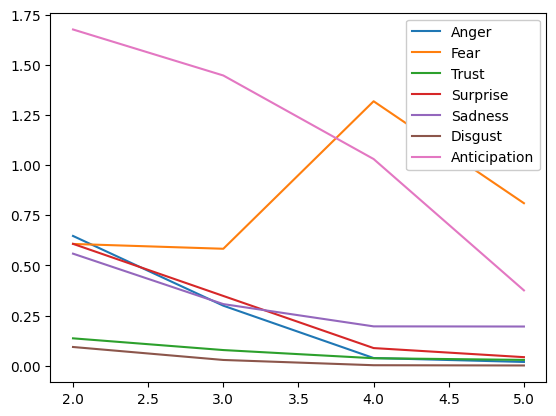

In [140]:
# Plot type 1, categories to log-odds(baseline cat-1) change...
plt.figure()
plt.plot(rating_Y, np.exp(anger_coeff), label = "Anger")
plt.plot(rating_Y, np.exp(fear_coeff), label = "Fear")
plt.plot(rating_Y, np.exp(trust_coeff), label="Trust")
plt.plot(rating_Y, np.exp(surprise_coeff), label="Surprise")
plt.plot(rating_Y, np.exp(sadness_coeff), label="Sadness")
plt.plot(rating_Y, np.exp(disgust_coeff), label="Disgust")
# plt.plot(rating_Y, np.exp(joy_coeff), label="Joy")
plt.plot(rating_Y, np.exp(anticip_coeff), label="Anticipation")
plt.legend(framealpha=1, frameon=True)
plt.show()

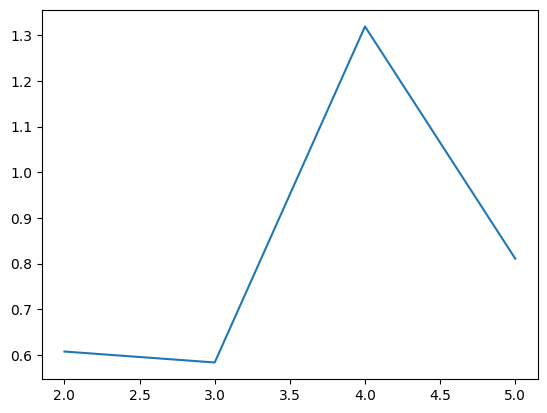

In [78]:
plt.figure()
plt.plot(rating_Y, np.exp(fear_coeff))
plt.show()

In [129]:
x_cord = np.linspace(0, 1, 100)
x_cord[1]

0.010101010101010102

In [178]:
emotions = [anger_coeff, fear_coeff, trust_coeff, surprise_coeff, sadness_coeff, disgust_coeff, joy_coeff, anticip_coeff]
emotions_list = [const_coeff, anger_coeff, fear_coeff, trust_coeff, surprise_coeff, sadness_coeff, disgust_coeff, joy_coeff, anticip_coeff]
emotions

[[-0.435, -1.2062, -3.2669, -3.9832],
 [-0.4987, -0.539, 0.277, -0.21],
 [-1.9921, -2.5518, -3.291, -3.5467],
 [-0.4978, -1.0559, -2.4323, -3.1571],
 [-0.5818, -1.1801, -1.629, -1.6329],
 [-2.3726, -3.557, -6.0767, -6.8857],
 [0.8515, 2.9372, 5.8011, 6.2123],
 [0.5172, 0.37, 0.0305, -0.979]]

In [182]:
Model_list = ["Model-1: Rating=2", "Model-2: Rating=3", "Model-3: Rating=4", "Model-4: Rating=5"]
beta_summary = pd.DataFrame(columns=Model_list, data=emotions_list, index=["Const Coeff", "Anger tFreq Coeff", "Fear tFreq Coeff", "Trust tFreq Coeff", "Surprise tFreq Coeff", "Sadness tFreq Coeff", "Disgust tFreq Coeff", "Joy tFreq Coeff", "Anticip tFreq Coeff"])
display(beta_summary)

,2,3,4,5
Const Coeff,0.0531,0.7310,0.8864,0.8950
Anger tFreq Coeff,-0.4350,-1.2062,-3.2669,-3.9832
Fear tFreq Coeff,-0.4987,-0.5390,0.2770,-0.2100
Trust tFreq Coeff,-1.9921,-2.5518,-3.2910,-3.5467
Surprise tFreq Coeff,-0.4978,-1.0559,-2.4323,-3.1571
Sadness tFreq Coeff,-0.5818,-1.1801,-1.6290,-1.6329
Disgust tFreq Coeff,-2.3726,-3.5570,-6.0767,-6.8857
Joy tFreq Coeff,0.8515,2.9372,5.8011,6.2123
Anticip tFreq Coeff,0.5172,0.3700,0.0305,-0.9790


In [172]:
# Function to get plot points per emotion...
def plott_emotion(temp_emotion):
    temp = temp_emotion
    cat_value = "1"

    x_cord = np.linspace(0, 1, 100)
    y_cord = []
    cat = [1, 2, 3, 4, 5]
    i = 0
    j = 0
    for j in range(len(cat)):
        y_res = []
        for i in range(len(x_cord)):
            res_temp1 = [t*x_cord[i] for t in temp_emotion]
            res_temp = np.exp(res_temp1)
            # display(res_temp)
            res_den = 1+sum(res_temp)
            if (cat[j] == 1):
                res_num = 1
            else:
                #display("j = %d"%j)
                #display("xcord = %f" %x_cord[i])
                # display(anger_coeff[cat[j]-2])
                # display(np.exp(anger_coeff[cat[j]-2]))
                res_temp2 = temp_emotion[cat[j]-2]*x_cord[i]
                res_num = np.exp(res_temp2)
            # display(res_num)
            res_fin = res_num/res_den
            # display("run")
            y_res.append(res_fin)
        # display(y_res)
        y_cord.append(y_res)
    plt.figure()
    plt.plot(x_cord, y_cord[0], label="Cat-1")
    plt.plot(x_cord, y_cord[1], label="Cat-2")
    plt.plot(x_cord, y_cord[2], label="Cat-3")
    plt.plot(x_cord, y_cord[3], label="Cat-4")
    plt.plot(x_cord, y_cord[4], label="Cat-5")
    plt.xlabel(" frequency of words reflecting sentiment in review")
    plt.ylabel("marginal Prob of Category")
    plt.legend(framealpha=1, frameon=True)
    plt.show()

'Plot for Emotion: Anger'

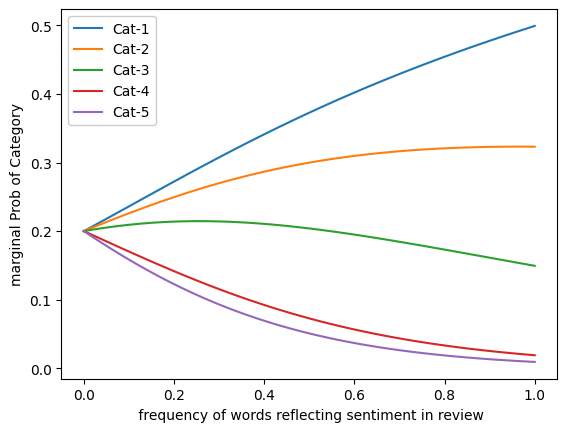

'Plot for Emotion: Fear'

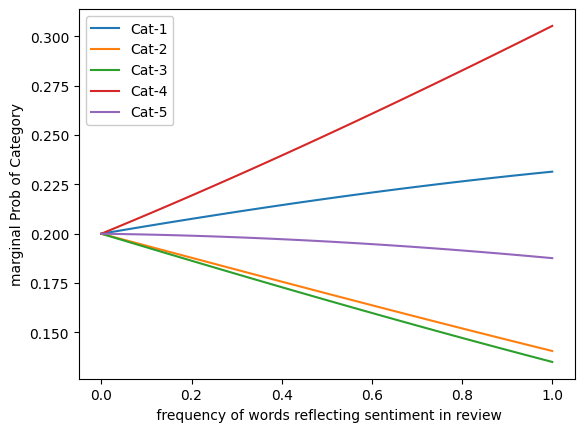

'Plot for Emotion: Trust'

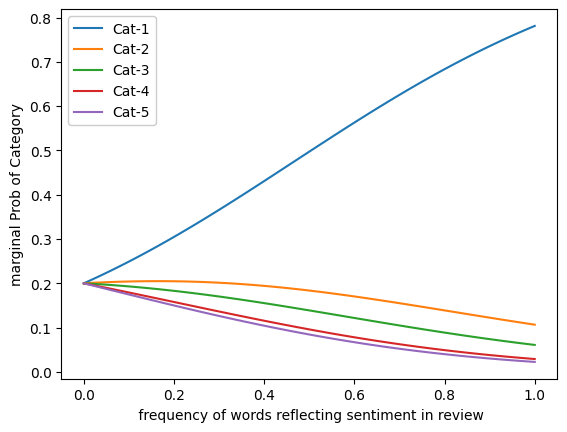

'Plot for Emotion: Surprise'

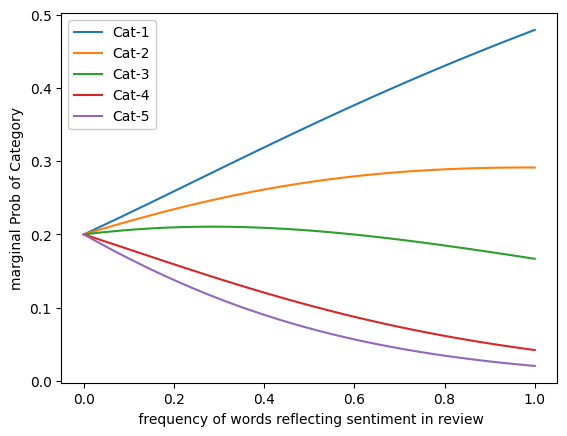

'Plot for Emotion: Sadness'

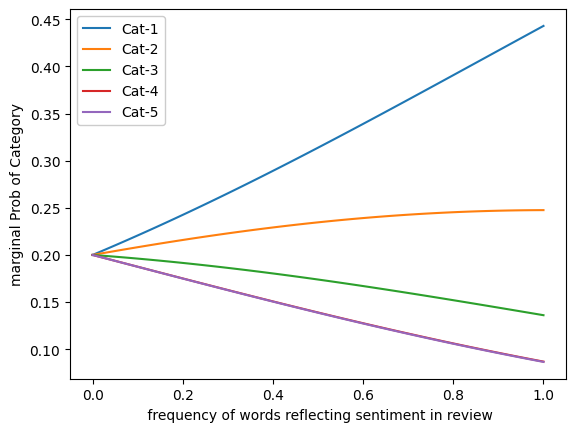

'Plot for Emotion: Disgust'

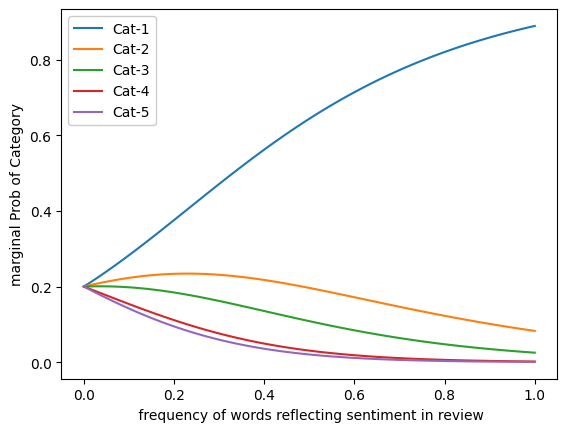

'Plot for Emotion: Joy'

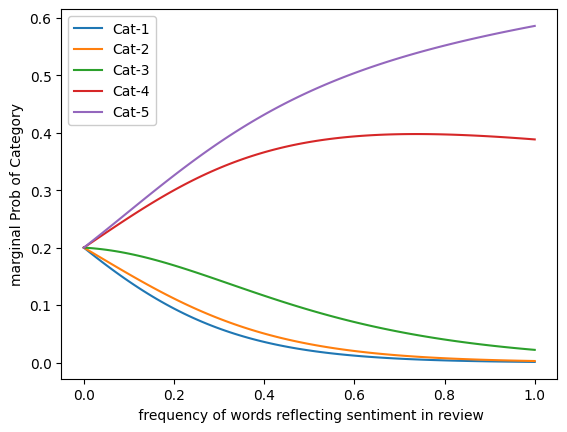

'Plot for Emotion: Anticipation'

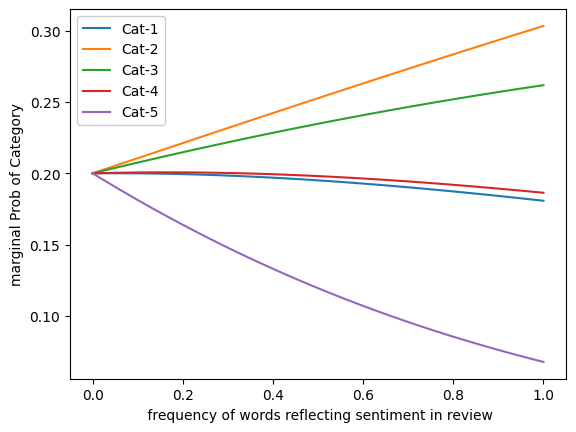

In [173]:
emo = ["Anger", "Fear", "Trust", "Surprise", "Sadness", "Disgust", "Joy", "Anticipation"]
for i,j in zip(emotions, emo):
    display("Plot for Emotion: " + j)
    plott_emotion(i)

#### Model-2 with 3 rating categories based on the Rating values

In [79]:
def func_rating(df_temp):
    if(df_temp["rating"] >= 4):
        return 1
    elif (df_temp["rating"] == 3):
        return 0
    else:
        return -1

In [80]:
df_result["rating_cat"] = df_result.apply(func_rating, axis=1)

In [81]:
df_result

,Unnamed: 0,userName,rating,review,isEdited,date,title,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,rating_cat
0,0,Savvanananahhh,4,For part I quite enjoy Snapchat it’s probably ...,False,10-04-2020 06:01,Performance issues,0.093023,0.000000,0.162791,0.209302,0.046512,0.209302,0.069767,0.069767,0.000000,0.139535,1
1,1,Idek 9-101112,3,"I’m sorry say it, something definitely wrong S...",False,10/14/20 2:13,What happened?,0.119048,0.047619,0.071429,0.071429,0.023810,0.214286,0.214286,0.166667,0.047619,0.023810,0
2,2,William Quintana,3,Snapchat update ruined story organization! Ok ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!,0.081633,0.061224,0.020408,0.142857,0.020408,0.285714,0.102041,0.102041,0.061224,0.122449,0
3,3,an gonna be unkown😏,5,I really love app long using say difficulties ...,False,4/22/21 14:10,The app is great,0.090909,0.000000,0.181818,0.045455,0.000000,0.136364,0.181818,0.227273,0.000000,0.136364,1
4,4,gzhangziqi,1,This super frustrating. I middle sending Snapc...,False,10-02-2020 13:58,"Locked me out, customer service not helping",0.047619,0.047619,0.000000,0.380952,0.047619,0.333333,0.047619,0.047619,0.047619,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used love using Snapchat I hardly ever do. T...,False,6/24/19 0:58,Major issue...not that it will get fixed,0.157895,0.105263,0.052632,0.052632,0.105263,0.210526,0.105263,0.052632,0.052632,0.105263,-1
9556,9556,changemaker kkdd,2,"Well, I deleted inappropriate content I resear...",False,6/23/19 13:42,I got then deleted it.,0.000000,0.062500,0.062500,0.187500,0.062500,0.250000,0.062500,0.062500,0.062500,0.187500,-1
9557,9557,teekay2much,4,Every time I upload photo video story upload l...,False,06-03-2019 03:35,Story problem,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,1
9558,9558,whoratheexplora,4,"Love app, since update I can’t upload snaps st...",False,06-03-2019 03:26,Bugs,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [82]:
x2 = pd.DataFrame(df_result[['fear', 'anger', 'trust', 'surprise', 'sadness', 'disgust', 'joy', 'anticip']])
y2 = df_result["rating_cat"]

In [83]:
logit_model2 = sm.MNLogit(y2, sm.add_constant(x2))
logit_model2
result = logit_model2.fit()
stats1 = result.summary()
print(stats1)

Optimization terminated successfully.
         Current function value: 1.010706
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:             rating_cat   No. Observations:                 9560
Model:                        MNLogit   Df Residuals:                     9542
Method:                           MLE   Df Model:                           16
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                 0.04812
Time:                        07:01:25   Log-Likelihood:                -9662.3
converged:                       True   LL-Null:                       -10151.
Covariance Type:            nonrobust   LLR p-value:                1.000e-197
rating_cat=0       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0346      0.127      0.273      0.785      -0.214       0.284
fear            -0.3283

In [84]:
str_review = ",".join(df_result["review"])

In [85]:
print(str_review)

For part I quite enjoy Snapchat it’s probably used app I phone it’s really convenient messaging people especially texting doesn’t work based various locations, like text messages don’t go I’m school buildings Snapchat messages will. I think it’s quite useful it’s fun use, however lately I’ve experiencing problems loading times. For past maybe two months it’s taking good 10 seconds load text I got, another three save text. I’ve various Wi-Fi connections well using data matter change Wi-Fi data problem get fixed I know that’s issue. Recently I found deleting things take storage phone help performance however time worked. I think thing Snapchat needs look problem since one main communication apps. Have time I get annoyed taking long load I use text message instead Snapchat it’s I wish I didn’t resort it. I hope Snapchat fixes problem soon.,I’m sorry say it, something definitely wrong Snapchat. In years using app, I never disappointed. Although Snapchat main social app phone, really buggin

In [86]:
text_object = NRCLex(str_review)

In [87]:
text_object.affect_dict

{'enjoy': ['anticipation', 'joy', 'positive', 'trust'],
 'convenient': ['positive'],
 'don': ['positive', 'trust'],
 'school': ['trust'],
 'fun': ['anticipation', 'joy', 'positive'],
 'good': ['anticipation', 'joy', 'positive', 'surprise', 'trust'],
 'save': ['joy', 'positive', 'trust'],
 'change': ['fear'],
 'problem': ['fear', 'negative', 'sadness'],
 'fixed': ['trust'],
 'found': ['joy', 'positive', 'trust'],
 'time': ['anticipation'],
 'main': ['positive'],
 'communication': ['trust'],
 'long': ['anticipation'],
 'hope': ['anticipation', 'joy', 'positive', 'surprise', 'trust'],
 'wrong': ['negative'],
 'disappointed': ['anger', 'disgust', 'negative', 'sadness'],
 'reassure': ['positive', 'trust'],
 'receiving': ['anticipation', 'joy', 'positive', 'surprise'],
 'obvious': ['positive', 'trust'],
 'received': ['positive'],
 'wasted': ['anger', 'disgust', 'negative'],
 'worth': ['positive'],
 'traveling': ['positive'],
 'worried': ['negative', 'sadness'],
 'worry': ['anticipation', 'fe